# Mounting G-drive & Library Needed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install emoji

In [ ]:
pip install plotly

In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import calendar

import warnings
warnings.filterwarnings('ignore')

# WhatsApp Chat Analysis with Python

**WhatsApp Chat Analytics using your WhatsApp data** can be used for a variety of data science tasks, including `sentiment analysis, keyword extraction, name entity recognition, and other natural language translation.` It is important to remember that the results of this analysis also depend greatly on who you are analyzing, as WhatsApp messages can hold information that is useful for solving business problems.

To extract your WhatsApp chats, simply open any chat with an individual or group and follow the steps mentioned below:

1. If you're using an iPhone, click on the Contact Name or Group Name. For Android smartphones, tap on the three dots above.
2. Scroll down and select Export Chat.
3. Then select without media for simplicity if it asks you whether you want your chats with or without media.
4. Then email this chat to yourself and download it to your system.

Once your WhatsApp conversation data is available, the next step is to carry out analysis using Python. In the next section, I will provide a step-by-step guide to perform WhatsApp conversation analysis with Python.

***The data that will be used in this project is a WhatsApp group chat from my class in the Bachelor of Data Science course. Let's start now.***

# PREPROCESSING DATA

## Create functions to help process data

In [ ]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

## Adjust Data Structure to Match With Pandas Dataframe

In [ ]:
data = []
conversation = '/content/drive/MyDrive/Colab Notebooks/Whatsapp Analysis Python/WhatsApp Chat with PETARUNX DATA🤼‍♂️.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

## Finally creating a Dataframe for storing all data inside

In [ ]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Time,Author,Message
0,2021-09-10,17:56,Aidah S1 Sains Data,Dapet kelas mana?
1,2021-09-10,17:57,Rahmat Sigit Hidayat S1 Sains Data,Podo kro thesion
2,2021-09-10,17:58,+62 852-1123-7635,Sm semua kyk e.yo
3,2021-09-10,17:58,Si Cantik😎 Sains Data,"Mksdny ap ya, gak paham"
4,2021-09-10,17:59,Rahmat Sigit Hidayat S1 Sains Data,basa jawa artinya sama kaya
...,...,...,...,...
39992,2024-01-15,14:23,Ryanta Meylinda Savira S1 Saints Data,trik nya adalah buat akun dlu sebelum game dim...
39993,2024-01-15,22:53,Rendika Nurhartanto S,btw gaessss mau nanyak ini libur sampe tanggal...
39994,2024-01-15,22:53,Mita S1 Sains Data,sepuasmu ren
39995,2024-01-15,22:56,Rendika Nurhartanto S,seng genna mit


## Shape of dataset

In [ ]:
df.shape

(39997, 4)

## Basic information of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39997 entries, 0 to 39996
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     39997 non-null  datetime64[ns]
 1   Time     39997 non-null  object        
 2   Author   38798 non-null  object        
 3   Message  39997 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ MB


## Null values in dataset

In [ ]:
df.isnull().sum()

Date          0
Time          0
Author     1199
Message       0
dtype: int64

## Droping Nan values from dataset


In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(38798, 4)

In [ ]:
### Checking authors of group
df['Author'].unique()

array(['Aidah S1 Sains Data', 'Rahmat Sigit Hidayat S1 Sains Data',
       '+62 852-1123-7635', 'Si Cantik😎 Sains Data', '+62 821-6101-0305',
       'Thasya S1 Sains Data', 'Avriono Aritonang S1 Sains Data',
       'Irma Octavia Chaniago S1 Sains Data', 'Rendika Nurhartanto S',
       'Angel Br Tarigan S1 Sains Data',
       'Ananda Taqhsya Dwiyana S1 Sains Data', 'Inge S1 Sains Data',
       'Tarisma Dwi Putri S1 Sains Data',
       'Ryanta Meylinda Savira S1 Saints Data',
       'Iffa Padang (S1 Sains Data)',
       'Febrian Farda Hasdikiyah S1 Sains Data',
       'Senna Yoga Abira S1 Sains Data',
       'Halim Arif Cahyono S1 Sains Data', '+62 812-1738-8413',
       'Rizal Rahman Rizkika S1 Saints Data', 'Alda S1 Sains Data',
       'Dida S1 Sains Data', 'Mita S1 Sains Data', '+62 852-5908-2194',
       'Ayudya S1 Sains Data', 'Farhan Nanda S1 Sains Data',
       '+62 857-3293-1725', 'Sigit 2',
       'Pikrie Hartanta Sembiring S1 Sains Data'], dtype=object)

In [ ]:
### Checking no. of authors of group
df['Author'].nunique()

29

In [ ]:
df[df['Author'] == 'Rendika Nurhartanto S']

,Date,Time,Author,Message
42,2021-09-10,18:19,Rendika Nurhartanto S,kelas apa iki rek? dimana dapetnya? igracias ?
44,2021-09-10,18:20,Rendika Nurhartanto S,ooooalah siap
45,2021-09-10,18:20,Rendika Nurhartanto S,aku cek dulu
51,2021-09-10,18:26,Rendika Nurhartanto S,<Media omitted>
54,2021-09-10,18:27,Rendika Nurhartanto S,loh aku belum registrasi on site
...,...,...,...,...
38787,2024-01-15,14:20,Rendika Nurhartanto S,Zal ngeri om
38788,2024-01-15,14:20,Rendika Nurhartanto S,Kayaknya pke bot
38794,2024-01-15,22:53,Rendika Nurhartanto S,btw gaessss mau nanyak ini libur sampe tanggal...
38796,2024-01-15,22:56,Rendika Nurhartanto S,seng genna mit


# Feature Engineering From Data

## Day_Name, Day, Month and Year

Extract from Date column to get **Day**, **Month** and **Year** from new column using datetime library which helps us to do this task easily.

In [ ]:
# Mengekstrak informasi Hari, Bulan, dan Tahun
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.strftime('%B')  # Menggunakan %B untuk mendapatkan nama bulan
df['Year'] = df['Date'].dt.year
# Menambahkan kolom 'Day_Name' yang berisi nama hari
df['Day_Name'] = df['Date'].dt.day_name()
# Changing the datatype of column "Day".
df['Day_Name'] = df['Day_Name'].astype('category')

In [ ]:
# Memilih kolom yang diinginkan
selected_columns = ['Date', 'Year', 'Month', 'Day', 'Day_Name', 'Time', 'Author', 'Message']
df = df[selected_columns]

In [ ]:
df.head()

,Date,Year,Month,Day,Day_Name,Time,Author,Message
0,2021-09-10,2021,September,10,Friday,17:56,Aidah S1 Sains Data,Dapet kelas mana?
1,2021-09-10,2021,September,10,Friday,17:57,Rahmat Sigit Hidayat S1 Sains Data,Podo kro thesion
2,2021-09-10,2021,September,10,Friday,17:58,+62 852-1123-7635,Sm semua kyk e.yo
3,2021-09-10,2021,September,10,Friday,17:58,Si Cantik😎 Sains Data,"Mksdny ap ya, gak paham"
4,2021-09-10,2021,September,10,Friday,17:59,Rahmat Sigit Hidayat S1 Sains Data,basa jawa artinya sama kaya


## Letter, Word, Url_count, Media_count, And Emoji
The added columns include **"Letter's"** (message length), **"Word's"** (number of words in the message), **"URL_Count"** (number of links in the message), and **"Media_Count"** (number of media in the message).

In [ ]:
### Menghitung jumlah huruf dalam setiap pesan
df["Letter's"] = df['Message'].apply(lambda s : len(s))
### Menghitung jumlah kata dalam setiap pesan
df["Word's"] = df['Message'].apply(lambda s : len(s.split(' ')))

In [ ]:
### Menghitung jumlah tautan dalam dataset pada setiap pesan
URLPATTERN = r'(https?://\S+)'
df['Url_Count'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)

In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if emoji.is_emoji(word):
            emoji_list.append(word)
    return emoji_list

df["Emoji's"] = df["Message"].apply(split_count)
emojis = sum(df["Emoji's"].apply(len))

In [ ]:
### Fungsi untuk menghitung jumlah media dalam obrolan.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x : regex.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)

In [ ]:
### dataset terbaru
df

,Date,Year,Month,Day,Day_Name,Time,Author,Message,Letter's,Word's,Url_Count,Emoji's,Media_Count
0,2021-09-10,2021,September,10,Friday,17:56,Aidah S1 Sains Data,Dapet kelas mana?,17,3,0,[],0
1,2021-09-10,2021,September,10,Friday,17:57,Rahmat Sigit Hidayat S1 Sains Data,Podo kro thesion,16,3,0,[],0
2,2021-09-10,2021,September,10,Friday,17:58,+62 852-1123-7635,Sm semua kyk e.yo,17,4,0,[],0
3,2021-09-10,2021,September,10,Friday,17:58,Si Cantik😎 Sains Data,"Mksdny ap ya, gak paham",23,5,0,[],0
4,2021-09-10,2021,September,10,Friday,17:59,Rahmat Sigit Hidayat S1 Sains Data,basa jawa artinya sama kaya,27,5,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38793,2024-01-15,2024,January,15,Monday,14:23,Ryanta Meylinda Savira S1 Saints Data,trik nya adalah buat akun dlu sebelum game dim...,50,9,0,[],0
38794,2024-01-15,2024,January,15,Monday,22:53,Rendika Nurhartanto S,btw gaessss mau nanyak ini libur sampe tanggal...,57,10,0,[],0
38795,2024-01-15,2024,January,15,Monday,22:53,Mita S1 Sains Data,sepuasmu ren,12,2,0,[],0
38796,2024-01-15,2024,January,15,Monday,22:56,Rendika Nurhartanto S,seng genna mit,14,3,0,[],0


# EDA (Exploratory Data Analysis)

In [ ]:
df.head()

,Date,Year,Month,Day,Day_Name,Time,Author,Message,Letter's,Word's,Url_Count,Emoji's,Media_Count
0,2021-09-10,2021,September,10,Friday,17:56,Aidah S1 Sains Data,Dapet kelas mana?,17,3,0,[],0
1,2021-09-10,2021,September,10,Friday,17:57,Rahmat Sigit Hidayat S1 Sains Data,Podo kro thesion,16,3,0,[],0
2,2021-09-10,2021,September,10,Friday,17:58,+62 852-1123-7635,Sm semua kyk e.yo,17,4,0,[],0
3,2021-09-10,2021,September,10,Friday,17:58,Si Cantik😎 Sains Data,"Mksdny ap ya, gak paham",23,5,0,[],0
4,2021-09-10,2021,September,10,Friday,17:59,Rahmat Sigit Hidayat S1 Sains Data,basa jawa artinya sama kaya,27,5,0,[],0


## Messages sent per day over a time period

In [ ]:
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1 = df1[['Date','message_count']]         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('Date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
# Mengekstrak informasi Hari, Bulan, dan Tahun
# Menambahkan kolom 'Day_Name' yang berisi nama hari
df1['Day_Name'] = df1['Date'].dt.day_name()
# Changing the datatype of column "Day".
df1['Day_Name'] = df1['Day_Name'].astype('category')
df1['Month'] = df1['Date'].dt.strftime('%B')  # Menggunakan %B untuk mendapatkan nama bulan
df1['Year'] = df1['Date'].dt.year

In [ ]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readability
matplotlib.rcParams['font.size'] = 40
matplotlib.rcParams['figure.figsize'] = (27, 6)

# A basic plot using Plotly Express
fig = px.line(df1, x='Date', y='message_count', title='Messages sent per day over a time period')

# Customizing the layout
fig.update_layout(title_text='Messages sent per day over a time period', title_x=0.5)  # Center the title

# # Saving the plot
# fig.write_image('msg_plots_plotly.png')

## Total Number of Chats by Day, Month and Year

In [ ]:
import plotly.express as px
import pandas as pd

# Pilih salah satu dari 'Day_Name', 'Month', atau 'Year'
selected_variable = 'Year'  # Ganti sesuai kebutuhan

# Group by selected variable and sum message_count
insight_2 = df1.groupby(selected_variable)['message_count'].sum().reset_index()

# Sorting based on selected variable
if selected_variable == 'Day_Name':
    insight_2 = insight_2.sort_values(by=selected_variable,
                                      key=lambda x: pd.Categorical(x, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True))
elif selected_variable == 'Month':
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    insight_2 = insight_2.sort_values(by=selected_variable,
                                      key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))

# Plot bar chart using Plotly Express
fig = px.bar(insight_2, x=selected_variable, y='message_count', labels={'message_count': 'Message Count'})

# Customizing layout
fig.update_layout(
    title=f'Messages Count Grouped by {selected_variable}',
    title_x=0.5,  # Center the title
    xaxis_title=selected_variable,
    yaxis_title='Message Count',
    font=dict(size=14),  # Adjust font size
    autosize=False,
    width=1100,  # Set plot width
    height=550  # Set plot height
)

# Tampilkan plot
fig.show()


## Sum of Chats by Day or Month based on year

In [ ]:
# Pilih salah satu dari 'Day_Name', atau 'Month'
selected_variable = 'Day_Name'  # Ganti sesuai kebutuhan

df_temporal = df.groupby(['Year', selected_variable]).size().reset_index(name='Message Count')

# Sorting based on selected variable
if selected_variable == 'Day_Name':
    df_temporal = df_temporal.sort_values(by=selected_variable,
                                      key=lambda x: pd.Categorical(x, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True))
elif selected_variable == 'Month':
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_temporal = df_temporal.sort_values(by=selected_variable,
                                      key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))

# Temporal analysis using Plotly Express
fig = px.line(df_temporal, x= selected_variable, y='Message Count', color='Year',
              labels={'Message Count': 'Message Count'},
              title='Monthly Message Count Over the Years')

# Customizing layout
fig.update_layout(
    title_x=0.5,  # Center the title
    xaxis_title= selected_variable,
    yaxis_title='Message Count',
    font=dict(size=14),  # Adjust font size
    autosize=False,
    width=1100,  # Set plot width
    height=550  # Set plot height
)

# Tampilkan plot
fig.show()

## Author contribution chats

In [ ]:
df_author = df['Author'].value_counts().reset_index(name='Message Count').rename(columns={"index": "Author"}).sort_values(by="Message Count", ascending=True)

import plotly.express as px

# Create horizontal bar chart using Plotly Express
fig = px.bar(df_author, x='Message Count', y='Author',
             labels={'Message Count': 'Message Count', 'Author': 'Author'},
             orientation='h',  # Set orientation to horizontal
             title='Author Contribution number of chats in Group')

# Customizing layout
fig.update_layout(
    title_x=0.5,  # Center the title
    xaxis_title='Message Count',
    yaxis_title='Author',
    font=dict(size=14),  # Adjust font size
    autosize=False,
    width=1100,  # Set plot width
    height=550  # Set plot height
)

# Show the plot
fig.show()

## Top Author based on words or letters in sent messages

In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Day', 'Day_Name', 'Time', 'Author', 'Message',
       'Letter's', 'Word's', 'Url_Count', 'Emoji's', 'Media_Count'],
      dtype='object')

In [ ]:
# ["Word's", "Letter's"]

Select_type = "Letter's"

df_author_based_on_words = df.groupby('Author')[Select_type].sum().reset_index(name=f'{Select_type} Count').sort_values(by=f'{Select_type} Count', ascending = True).reset_index(drop = True)

# Create horizontal bar chart using Plotly Express
fig = px.bar(df_author_based_on_words, x=f'{Select_type} Count', y="Author",
             labels={f'{Select_type} Count': f'{Select_type} Count', 'Author': 'Author'},
             orientation='h',  # Set orientation to horizontal
             title=f"Author Contribution Based on {Select_type} Count")

# Customizing layout
fig.update_layout(
    title_x=0.5,  # Center the title
    xaxis_title=f'{Select_type} Count',
    yaxis_title='Author',
    font=dict(size=14),  # Adjust font size
    autosize=False,
    width=1100,  # Set plot width
    height=550  # Set plot height
)

# Show the plot
fig.show()


## Total Number of Emoji in sent messages

In [ ]:
df.head()

,Date,Year,Month,Day,Day_Name,Time,Author,Message,Letter's,Word's,Url_Count,Emoji's,Media_Count
0,2021-09-10,2021,September,10,Friday,17:56,Aidah S1 Sains Data,Dapet kelas mana?,17,3,0,[],0
1,2021-09-10,2021,September,10,Friday,17:57,Rahmat Sigit Hidayat S1 Sains Data,Podo kro thesion,16,3,0,[],0
2,2021-09-10,2021,September,10,Friday,17:58,+62 852-1123-7635,Sm semua kyk e.yo,17,4,0,[],0
3,2021-09-10,2021,September,10,Friday,17:58,Si Cantik😎 Sains Data,"Mksdny ap ya, gak paham",23,5,0,[],0
4,2021-09-10,2021,September,10,Friday,17:59,Rahmat Sigit Hidayat S1 Sains Data,basa jawa artinya sama kaya,27,5,0,[],0


In [ ]:
total_emojis_list = list(set([a for b in df["Emoji's"] for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in df["Emoji's"] for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])

# Selecting the top ten emojis
top_ten_emojis = emoji_df.head(10)

# Create a bar chart using Plotly Express
fig = px.bar(top_ten_emojis, x='emoji', y='count', title='Top Ten Emoji Usage Count')

# Customizing layout
fig.update_layout(
    title_x=0.5,  # Center the title
    xaxis_title='Emoji',
    yaxis_title='Count',
    font=dict(size=14),
    autosize=False,
    width=1100,
    height=550
)

# Show the bar chart for the top ten emojis
fig.show()


## Single Simple Numerik Information

In [ ]:
total_messages = df.shape[0]
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media))
print('Total Number of Links : {}'.format(links))
print('Total Number of Emojis : {}'.format(emojis))
# All variables used are above

Group Chatting Stats : 
Total Number of Messages : 38798
Total Number of Media Messages : 3655
Total Number of Links : 384
Total Number of Emojis : 6626


## Most Active Hours

In [ ]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]  # Helper column to keep a count.

df3['Time'] = pd.to_datetime(df3['Time'])
df3['hour'] = df3['Time'].dt.hour

grouped_by_time = df3.groupby('hour').sum().reset_index().sort_values(by='hour')

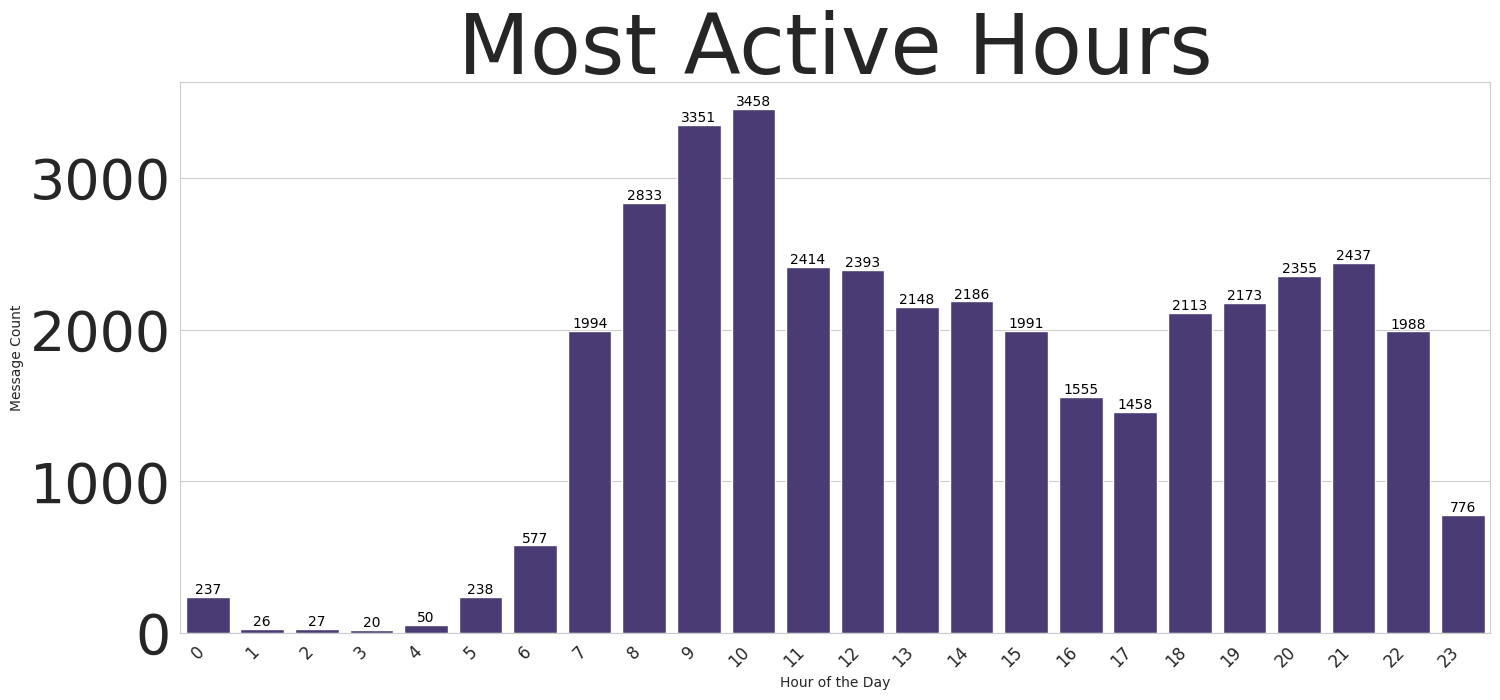

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'grouped_by_time' is your DataFrame grouped by hour

# Beautifying Default Styles using Seaborn
sns.set_style("whitegrid")
sns.set_palette("viridis")  # You can choose a different color palette

# PLOT: grouped by hour
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=grouped_by_time.index, y='message_count', data=grouped_by_time)

# Adding labels and title
ax.set(xlabel='Hour of the Day', ylabel='Message Count', title='Most Active Hours')

# Rotating x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)  # Adjust font size

# Adding grid for better visualization
ax.yaxis.grid(True)

# Adding value annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjusting y-axis label font size
ax.yaxis.label.set_size(10)  # Adjust font size

# Adjusting x-axis label font size
ax.xaxis.label.set_size(10)  # Adjust font size

# Adjusting title font size
ax.title.set_size(60)  # Adjust font size

# Display the plot
plt.tight_layout()
plt.show()

# Text Preprocessing

## Import Library for Text Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

## Lowercasing / Case Folding

In [ ]:
df2 = df.copy()

In [ ]:
# Melakukan operasi pada setiap DataFrame dalam list
df2['Message'] = df2['Message'].apply(lambda x: x.lower() if isinstance(x, str) else x)

## Menghapus Angka dalam Text

In [ ]:
# Fungsi untuk menghapus angka dari string
def remove_numbers(text):
    if isinstance(text, str):  # Pastikan teks adalah string
        return regex.sub(r'\d+', '', text)  # Menghapus angka dari teks
    else:
        return str(text)  # Mengonversi ke string jika tipe data lainnya

In [ ]:
# Menggunakan apply() pada kolom 'Message' untuk menghapus angka
df2['Message'] = df2['Message'].apply(remove_numbers)

## Menghapus Tanda Baca

In [ ]:
# Fungsi untuk menghapus tanda baca dari string
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# Menggunakan apply() pada kolom 'Message' untuk menghapus tanda baca
df2['Message'] = df2['Message'].apply(remove_punctuation)

## Stopword filter to Text

In [ ]:
from nltk.corpus import stopwords

# Get the set of Indonesian stopwords from NLTK
stop_words_nltk = set(stopwords.words('indonesian')) # --- NLTK ---
stemmer = PorterStemmer()

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory # --- Sastrawi ---

# Get the set of Indonesian stopwords from Sastrawi
stop_factory = StopWordRemoverFactory()
stopword_remover = stop_factory.create_stop_word_remover()
# Menambahkan Stopword Manual Sendiri
more_stopword = more_stopword = ['yg','dengan', 'ia','bahwa','oleh','dan','ini','itu','indonesia','ada','aku','untuk','tapi','mau','jadi', 'aja', 'nya', 'tak', 'gak', 'apa', 'kalo', 'pak', 'sama', 'semua', 'gue', 'kan','bukan', 'url', 'baru', 'anak', 'satu', 'punya', 'udah', 'kau', 'utk', 'kata', 'tau', 'biar', 'lebih', 'naik', 'cuma', 'mana', 'siapa', 'bilang', 'haru', 'menjadi','orang','sih','amp','kok','kalau', 'jangan', 'gua', 'buat', 'lah', 'kok', 'banyak', 'kamu','jangan', 'dulu', 'malah', 'emang', 'tuh', 'teru', 'sekarang', 'bang', 'lalu', 'hidup','memang', 'samp', 'klo', 'pernah', 'masuk', 'nih', 'banget', 'pale', 'manusia', 'minta', 'makan', 'mungkin', 'padah']
stop_words_sastrawi = stop_factory.get_stop_words() + more_stopword # Menggabungkan Sastrawi + NLTK
# stop_words_sastrawi

In [ ]:
stop_words_combined = stop_words_nltk.union(stop_words_sastrawi)

# Convert the combined stopwords back to a list
stopword_id = list(stop_words_combined)

# Display the combined stopwords
# stopword_id

## Check inside Stopword


In [ ]:
# Fungsi untuk Mengecek apakah Sebuah kata terdapat di Stopwordnya
def check_stopword():
    kata = input("Masukkan kata: ").lower()

    if kata in stopword_id:
        print(f"'{kata}' adalah sebuah stopword.")
    else:
        print(f"'{kata}' bukan stopword.")

# Memanggil fungsi untuk memeriksa kata yang dimasukkan pengguna
# check_stopword()

## Stemming with indonesian language

In [ ]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

print(stemmer.stem('Mereka meniru-nirukannya'))

mereka tiru


## Apply all Text Preprocessing with Function

In [ ]:
def preprocess_text(text): # Function
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopword_id]
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_words)

In [ ]:
# # Preprocessing kolom 'JAWABAN'

# df2['Message'] = df2['Message'].apply(preprocess_text) # Applying the preprocessing
# # 30 menit

In [ ]:
df2_after_preprocessing = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Whatsapp Analysis Python/Data Whatsapp Chat After Preprocessing Text.csv")

In [ ]:
# df2.to_csv("/content/drive/MyDrive/Colab Notebooks/Whatsapp Analysis Python/Data Whatsapp Chat After Preprocessing Text.csv")

## Menggabungkan semua text yang ada pada kolom df2['Message']

In [ ]:
# Menggabungkan semua teks dari kolom "JAWABAN" dalam satu string
pesan_combined_df2 = ' '.join(df2_after_preprocessing['Message'].astype(str).values)

## pisahkan menjadi list setiap kata yang ada

In [ ]:
word_seperated_pesan_df2 = word_tokenize(pesan_combined_df2)

## Cek kemunculan setiap kata yang ada

In [ ]:
kemunculan_word_df2 = nltk.FreqDist(word_seperated_pesan_df2)

In [ ]:
kemunculan_word_df2.most_common()

[('media', 3662),
 ('omitted', 3655),
 ('nan', 3304),
 ('jam', 1103),
 ('ga', 1023),
 ('oke', 869),
 ('iya', 828),
 ('besok', 667),
 ('kelompok', 655),
 ('data', 552),
 ('rek', 538),
 ('this', 518),
 ('kelas', 515),
 ('message', 509),
 ('deleted', 490),
 ('was', 472),
 ('dah', 453),
 ('e', 450),
 ('tugas', 444),
 ('wes', 429),
 ('ku', 411),
 ('zoom', 401),
 ('lupa', 389),
 ('ta', 385),
 ('ges', 366),
 ('wkwk', 352),
 ('teman', 336),
 ('pagi', 333),
 ('pj', 321),
 ('bu', 320),
 ('gitu', 315),
 ('mahasiswa', 314),
 ('mas', 309),
 ('gimana', 303),
 ('nama', 302),
 ('ren', 301),
 ('selamat', 300),
 ('wkwkwk', 299),
 ('makasih', 294),
 ('dosen', 293),
 ('sigit', 287),
 ('irma', 286),
 ('pake', 283),
 ('link', 283),
 ('jumat', 272),
 ('kampus', 269),
 ('sains', 268),
 ('isi', 267),
 ('kumpul', 267),
 ('terimakasih', 265),
 ('info', 264),
 ('gais', 262),
 ('senna', 257),
 ('loh', 255),
 ('ae', 255),
 ('surabaya', 255),
 ('ganti', 251),
 ('join', 249),
 ('rendika', 248),
 ('minggu', 245),
 ('t

# ***Visualize the Insight***

## Wordcloud

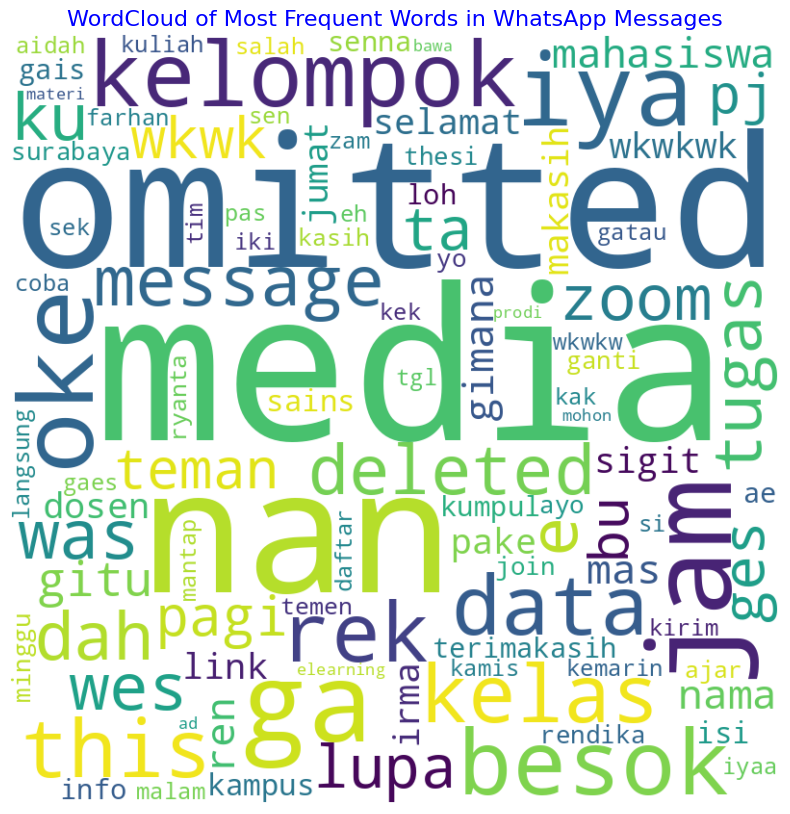

In [ ]:
# Create WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      colormap='viridis',  # You can choose a different colormap
                      max_words=100,       # Set the maximum number of words
                      contour_color='black', contour_width=1).generate_from_frequencies(kemunculan_word_df2)

# Plot WordCloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Frequent Words in WhatsApp Messages', fontsize=16, color='blue')

# Display the plot
plt.show()

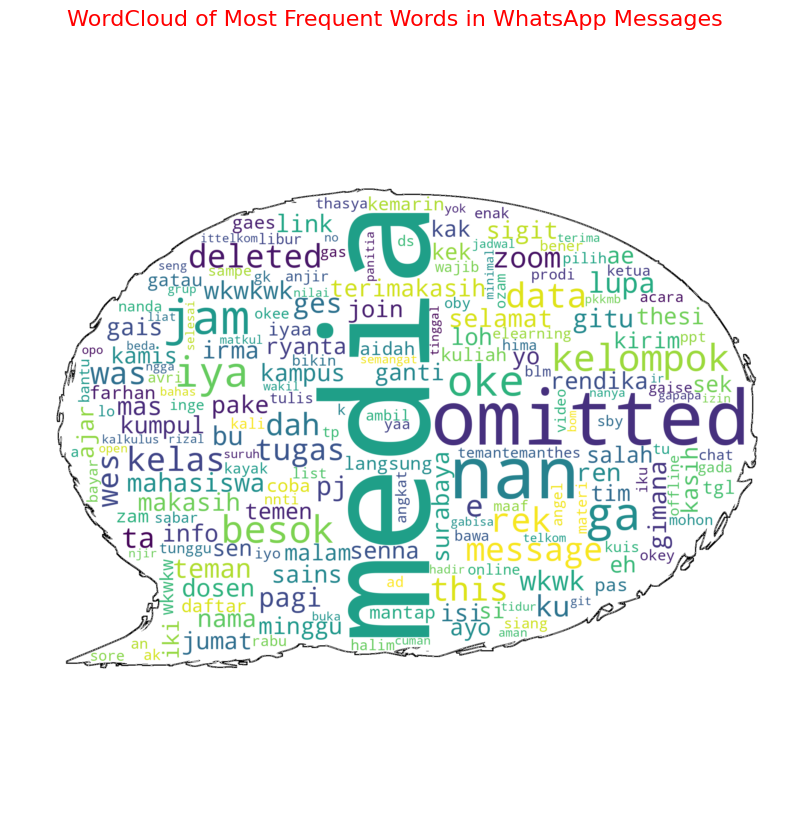

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Assuming kemunculan_word_df2 is a dictionary with word frequencies

# Load a heart-shaped mask
heart_mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Whatsapp Analysis Python/comment.png"))

# Create WordCloud with the heart-shaped mask
wordcloud = WordCloud(width=800, height=500, background_color='white', mask=heart_mask,
                      contour_color='black', contour_width=1).generate_from_frequencies(kemunculan_word_df2)

# Plot WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Frequent Words in WhatsApp Messages', fontsize=16, color='red')

# Display the plot
plt.show()

## Barchart for visualize freq of each word

In [ ]:
kata_df2 = kemunculan_word_df2.most_common(20)

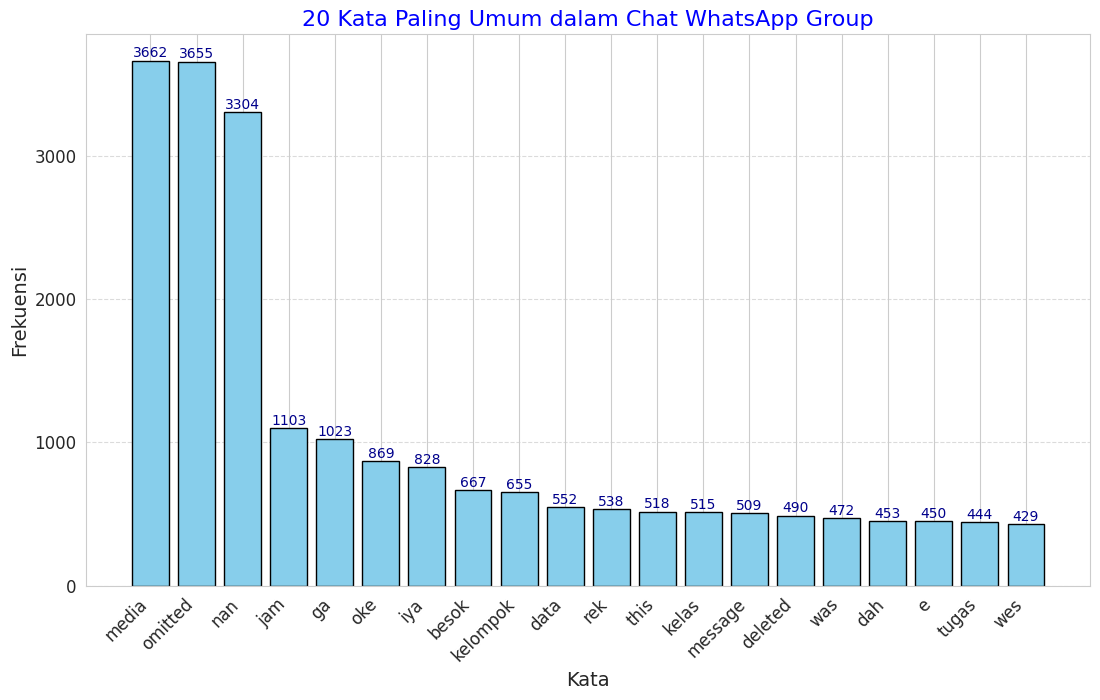

In [ ]:
# Ekstraksi kata dan frekuensinya untuk plotting
kata_umum, frekuensi_umum = zip(*kata_df2)

# Plot bar chart untuk kata umum
plt.figure(figsize=(12, 8))
bars_umum = plt.bar(kata_umum, frekuensi_umum, color='skyblue', edgecolor='black')  # Menambahkan edgecolor untuk batas bar
plt.xticks(rotation=45, ha='right', fontsize=12)  # Mengatur rotasi dan ukuran font label sumbu x
plt.yticks(fontsize=12)  # Mengatur ukuran font label sumbu y
plt.xlabel('Kata', fontsize=14)  # Mengatur ukuran font label sumbu x
plt.ylabel('Frekuensi', fontsize=14)  # Mengatur ukuran font label sumbu y
plt.title('20 Kata Paling Umum dalam Chat WhatsApp Group', fontsize=16, color='blue')  # Menambahkan warna pada judul
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid pada sumbu y

# Menambahkan label ke setiap bar pada kata umum
for bar, freq in zip(bars_umum, frekuensi_umum):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(freq),
             ha='center', va='bottom', fontsize=10, color='darkblue')  # Menambahkan warna dan ukuran font

plt.tight_layout()
plt.show()

## Extract basic statistics based on specific authors

In [ ]:
all_Authors = df2.Author.unique()

Selected_author = all_Authors[0]

In [ ]:
### Filtering out messages of particular user
req_df_spesific_author = df[df["Author"] == Selected_author]
### req_df_spesific_author will contain messages of only one particular user
print(f'--> Stats of {Selected_author} <-- ')
### shape will print number of rows which indirectly means the number of messages
print('Total Message Sent : ', req_df_spesific_author.shape[0])
### Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
words_per_message = (np.sum(req_df_spesific_author["Word's"]))/req_df_spesific_author.shape[0]
w_p_m = ("%.3f" % round(words_per_message, 2))
print('Average Words per Message : ', w_p_m)
### spesific_author_media conists of media messages
spesific_author_media = sum(req_df_spesific_author["Media_Count"])
print('Total Media Message Sent : ', spesific_author_media)
### spesific_author_links consist of total links
spesific_author_links = sum(req_df_spesific_author["Url_Count"])
print('Total Links Sent : ', spesific_author_links)
print()
print('----------------------------------------------------------')

--> Stats of Aidah S1 Sains Data <-- 
Total Message Sent :  4265
Average Words per Message :  4.220
Total Media Message Sent :  157
Total Links Sent :  6

----------------------------------------------------------


## Selected Messages Based on the spesific word

In [ ]:
Selected_word = 'nan'
bol_case = True

In [ ]:
# Fill NaN values in the 'Message' column with an empty string
df2_after_preprocessing['Message'].fillna('', inplace=True)

# Select messages containing the word 'nan' (case-insensitive)
selected_messages = df2_after_preprocessing[df2_after_preprocessing['Message'].str.contains(Selected_word, case=bol_case)]

# Display the selected messages
selected_messages

,Unnamed: 0,Date,Year,Month,Day,Day_Name,Time,Author,Message,Letter's,Word's,Url_Count,Emoji's,Media_Count
195,195,2021-09-13,2021,September,13,Monday,14:37,Rahmat Sigit Hidayat S1 Sains Data,gais nanya tp oot,25,6,0,[],0
586,586,2021-09-20,2021,September,20,Monday,18:55,Avriono Aritonang S1 Sains Data,nanya atuh,19,4,0,[],0
589,589,2021-09-20,2021,September,20,Monday,18:56,Senna Yoga Abira S1 Sains Data,nanya maaf konsen,31,7,0,['😂'],0
765,765,2021-09-21,2021,September,21,Tuesday,18:48,Aidah S1 Sains Data,nandi rek,14,3,0,[],0
783,783,2021-09-23,2021,September,23,Thursday,12:12,Thasya S1 Sains Data,tugas ku menang,36,6,0,['😭'],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38608,38608,2024-01-08,2024,January,8,Monday,07:06,Thasya S1 Sains Data,gais nanya bawa laptop engga,45,8,0,[],0
38614,38614,2024-01-08,2024,January,8,Monday,07:14,Thasya S1 Sains Data,oke nanda,9,2,0,[],0
38622,38622,2024-01-08,2024,January,8,Monday,09:17,Ryanta Meylinda Savira S1 Saints Data,oke nan makasih,15,3,0,[],0
38714,38714,2024-01-15,2024,January,15,Monday,13:48,Ryanta Meylinda Savira S1 Saints Data,apagunanya usaha ngulang matkul klau ujung gan...,101,16,0,[],0
